In [65]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
intermediate_dir = "../00_data/02_intermediate/"

In [67]:
df = pd.read_csv(f"{intermediate_dir}agg_all.csv")
#df = df.drop(columns=["physical_access", "adult_sti", "adult_excessive_drinking"])

In [68]:
df.columns[::-1]

Index(['noise90n', 'noise80n', 'noise70n', 'Weighted_RESP', 'Park_Area_Acres',
       'gdp', 'v045_rawvalue', 'v067_numerator', 'v063_rawvalue',
       'v062_numerator', 'v082_numerator', 'v023_numerator', 'v069_numerator',
       'v070_numerator', 'v060_rawvalue', 'v049_rawvalue', 'v011_rawvalue',
       'v009_rawvalue', 'v052_rawvalue', 'v051_rawvalue', 'Data_value_unit',
       'Data_value', 'Sample_Size', 'cbsacode', 'Year'],
      dtype='object')

In [69]:
rename_dict = {
    'v009_rawvalue': 'adult_smoking',
    'v011_rawvalue': 'adult_obesity',
    'v045_rawvalue': 'sti',
    'v049_rawvalue': 'excessive_drinking',
    'v051_rawvalue': 'population',
    'v052_rawvalue': 'under_18_pct',
    'v060_rawvalue': 'diabetes_prevalence',
    'v070_numerator': 'no_time_activity',
    'v069_numerator': 'some_college',
    'v023_numerator': 'unemployment',
    'v082_numerator': 'children_single_parent',
    'v062_numerator': 'mental_health_providers',
    'v063_rawvalue': 'median_household_income',
    'v067_numerator': 'driving_alone_to_work'
}

df = df.rename(columns=rename_dict)


In [70]:
df

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n
0,2011,10740,2880,21.78,%,857903.0,211769.371000,123687.787094,135700.693621,85547.993919,38302.509293,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
1,2020,10740,1088,19.38,%,915927.0,202255.000171,111266.454433,173594.906960,117863.312052,53458.421988,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
2,2019,10740,1016,16.87,%,910726.0,204493.000009,101728.220196,169008.339998,115075.252617,57659.758999,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
3,2018,10740,1308,18.17,%,909906.0,207204.999990,101205.181580,158576.491002,114501.104879,56426.485001,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
4,2017,10740,1440,22.02,%,907301.0,208968.999992,112905.592342,156051.673002,97792.854210,53530.420001,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,117781.869004,157248.045005,127031.754004,53032.674002,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
860,2012,49340,601,19.26,%,803701.0,189673.436000,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
861,2011,49340,468,17.60,%,803701.0,189673.436000,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
862,2021,49340,302,20.31,%,830622.0,173394.999992,115771.049543,185995.241002,145142.335681,60464.884001,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980


In [71]:
    # 'v009', # adult smoking #--
    # 'v011', # adult obesity #--
    # 'v045', # sti #--xx
    # 'v049', # excessive drinking #--xx
    # 'v051', # pop raw #
    # 'v052', # Percentage of population below 18 years of age. #
    # 'v060',  # diabetes prevalence #--
    # #'v132' # Percentage of population with adequate access to locations for physical activity #
    # 'v070', #--xx Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).
    # 'v069', # some college
    # 'v023', # unemployment
    # 'v082', # children in single-parent households
    # 'v062', # mental health providers
    # 'v063', # median household income
    # 'v067'#, # driving alone to work

In [72]:
df.columns

Index(['Year', 'cbsacode', 'Sample_Size', 'Data_value', 'Data_value_unit',
       'population', 'under_18_pct', 'adult_smoking', 'adult_obesity',
       'excessive_drinking', 'diabetes_prevalence', 'no_time_activity',
       'some_college', 'unemployment', 'children_single_parent',
       'mental_health_providers', 'median_household_income',
       'driving_alone_to_work', 'sti', 'gdp', 'Park_Area_Acres',
       'Weighted_RESP', 'noise70n', 'noise80n', 'noise90n'],
      dtype='object')

In [73]:
# print(df[df.columns[2:]].isna().sum())  # Check NaN counts
# print(np.isinf(df[df.columns[2:]]).sum())  # Check Inf counts
df[df.columns[5:]] = df[df.columns[5:]].replace([np.inf, -np.inf], np.nan)

# Drop rows where any of the selected columns contain NaN
# df = df.dropna(subset=df.columns[5:])
#print(np.isinf(df[df.columns[2:]]).sum()) 
df[df.columns[5:]]

,population,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n
0,857903.0,211769.371000,123687.787094,135700.693621,85547.993919,38302.509293,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
1,915927.0,202255.000171,111266.454433,173594.906960,117863.312052,53458.421988,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
2,910726.0,204493.000009,101728.220196,169008.339998,115075.252617,57659.758999,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
3,909906.0,207204.999990,101205.181580,158576.491002,114501.104879,56426.485001,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
4,907301.0,208968.999992,112905.592342,156051.673002,97792.854210,53530.420001,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,801227.0,184567.999979,117781.869004,157248.045005,127031.754004,53032.674002,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
860,803701.0,189673.436000,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
861,803701.0,189673.436000,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980
862,830622.0,173394.999992,115771.049543,185995.241002,145142.335681,60464.884001,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980


## pca

In [74]:
df.columns

Index(['Year', 'cbsacode', 'Sample_Size', 'Data_value', 'Data_value_unit',
       'population', 'under_18_pct', 'adult_smoking', 'adult_obesity',
       'excessive_drinking', 'diabetes_prevalence', 'no_time_activity',
       'some_college', 'unemployment', 'children_single_parent',
       'mental_health_providers', 'median_household_income',
       'driving_alone_to_work', 'sti', 'gdp', 'Park_Area_Acres',
       'Weighted_RESP', 'noise70n', 'noise80n', 'noise90n'],
      dtype='object')

In [75]:
# 'v009', # adult smoking #--
# 'v011', # adult obesity #--
# 'v060',  # diabetes prevalence #--

In [76]:
numeric_cols1 = ['adult_smoking', 'adult_obesity', 'diabetes_prevalence']
col_keep = [i for i in df.columns if i not in numeric_cols1]


scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df[numeric_cols1]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled1)
pca1 = PCA(n_components=1)#
principal_component1 = pca1.fit_transform(df_scaled1)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.05% of the variance.


In [77]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


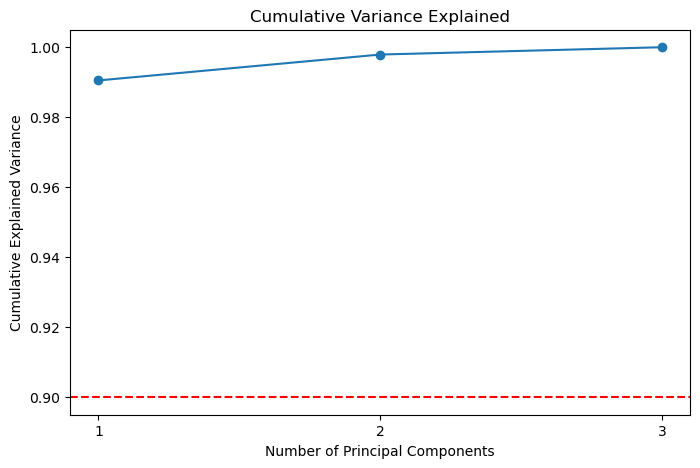

In [78]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [79]:
df_pca_1 = pca.transform(df_scaled1)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_1, np.zeros((df_pca_1.shape[0], df_scaled1.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled1 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0095


In [80]:
df_scaled1

array([[-0.39856586, -0.52548411, -0.52099898],
       [-0.43567687, -0.45923654, -0.4504302 ],
       [-0.4641741 , -0.46725489, -0.43086799],
       ...,
       [-0.39936729, -0.50186909, -0.46490239],
       [-0.42221857, -0.43755798, -0.4178068 ],
       [-0.47736683, -0.40178041, -0.4482978 ]])

In [81]:
principal_component1

array([[-8.34472106e-01],
       [-7.76764962e-01],
       [-7.86523191e-01],
       [-8.01292169e-01],
       [-7.91498084e-01],
       [-7.46728489e-01],
       [-6.84084886e-01],
       [-8.01312669e-01],
       [-8.13241170e-01],
       [-8.05544078e-01],
       [-8.29443314e-01],
       [-7.56937234e-01],
       [-1.05959954e+00],
       [-1.07069832e+00],
       [-1.06426002e+00],
       [-1.05186427e+00],
       [-1.05695545e+00],
       [-1.06737701e+00],
       [-1.05956079e+00],
       [-1.06224672e+00],
       [-1.04402304e+00],
       [-1.06347182e+00],
       [-1.03274637e+00],
       [-1.04156682e+00],
       [ 1.81837944e+00],
       [ 2.24933287e+00],
       [ 1.92389081e+00],
       [ 1.85873971e+00],
       [ 1.90157091e+00],
       [ 2.00369650e+00],
       [ 2.92836334e+00],
       [ 2.45078969e+00],
       [ 2.13199854e+00],
       [ 2.34244920e+00],
       [ 2.63355910e+00],
       [ 2.49846041e+00],
       [-8.24938695e-01],
       [-8.73021812e-01],
       [-8.3

In [82]:
type(col_keep)

list

In [83]:
col_keep

['Year',
 'cbsacode',
 'Sample_Size',
 'Data_value',
 'Data_value_unit',
 'population',
 'under_18_pct',
 'excessive_drinking',
 'no_time_activity',
 'some_college',
 'unemployment',
 'children_single_parent',
 'mental_health_providers',
 'median_household_income',
 'driving_alone_to_work',
 'sti',
 'gdp',
 'Park_Area_Acres',
 'Weighted_RESP',
 'noise70n',
 'noise80n',
 'noise90n']

In [84]:
df_pca1 = pd.DataFrame(principal_component1, columns=['smo_obe_dia'])

df_final = pd.concat([df[col_keep], df_pca1], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632


In [85]:
df_final.smo_obe_dia.max(),df_final.smo_obe_dia.min()

(10.396447013907988, -1.2240783708081178)

In [86]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632


## 2 factors: smoking + obesity

In [87]:
numeric_cols2 = ['adult_smoking', 'adult_obesity']

scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df[numeric_cols2]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 2
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled2)
pca2 = PCA(n_components=1)#
principal_component2 = pca2.fit_transform(df_scaled2)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.27% of the variance.


In [88]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


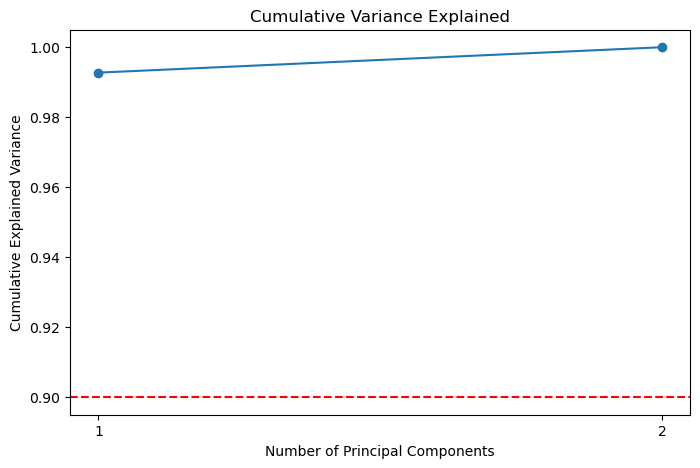

In [89]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [90]:
df_pca_2 = pca.transform(df_scaled2)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_2, np.zeros((df_pca_2.shape[0], df_scaled2.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled2 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0073


In [91]:
df_scaled2

array([[-0.39856586, -0.52548411],
       [-0.43567687, -0.45923654],
       [-0.4641741 , -0.46725489],
       ...,
       [-0.39936729, -0.50186909],
       [-0.42221857, -0.43755798],
       [-0.47736683, -0.40178041]])

In [92]:
df_pca2 = pd.DataFrame(principal_component2, columns=['smo_obe'])

df_final = pd.concat([df_final, df_pca2], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954


In [93]:
df_final.smo_obe.max(),df_final.smo_obe.min()

(8.138735875712214, -1.0251168908694543)

In [94]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954


## 2 factors: smoking + diabetes

In [95]:
numeric_cols3 = ['adult_smoking', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled3 = scaler.fit_transform(df[numeric_cols3]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled3)
pca3 = PCA(n_components=1)#
principal_component3 = pca3.fit_transform(df_scaled3)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 98.95% of the variance.


In [96]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


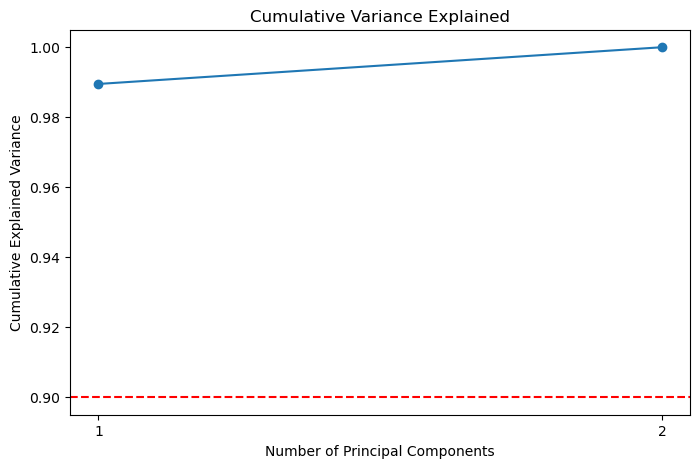

In [97]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()

In [98]:
df_pca_3 = pca.transform(df_scaled3)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_3, np.zeros((df_pca_3.shape[0], df_scaled3.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled3 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0105


In [99]:
df_scaled3

array([[-0.39856586, -0.52099898],
       [-0.43567687, -0.4504302 ],
       [-0.4641741 , -0.43086799],
       ...,
       [-0.39936729, -0.46490239],
       [-0.42221857, -0.4178068 ],
       [-0.47736683, -0.4482978 ]])

In [100]:
df_pca3 = pd.DataFrame(principal_component3, columns=['smo_dia'])

df_final = pd.concat([df_final, df_pca3], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402,-0.650231
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799,-0.626572
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620,-0.632890
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620,-0.638056
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023,-0.622872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242,-0.614210
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351,-0.608233
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270,-0.611131
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954,-0.593988


In [101]:
df_final.smo_dia.max(),df_final.smo_dia.min()

(8.456854473073564, -0.9881815383968137)

In [102]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402,-0.650231
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799,-0.626572
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620,-0.632890
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620,-0.638056
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023,-0.622872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242,-0.614210
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351,-0.608233
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270,-0.611131
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954,-0.593988


## 2 factors: obesity + diabetes

In [103]:
numeric_cols4 = ['adult_obesity', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled4 = scaler.fit_transform(df[numeric_cols4]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled4)
pca4 = PCA(n_components=1)#
principal_component4 = pca4.fit_transform(df_scaled4)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.64% of the variance.


In [104]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


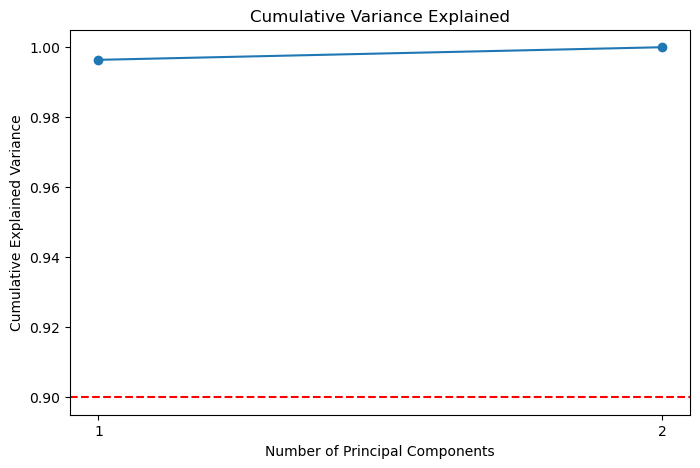

In [105]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [106]:
df_pca_4 = pca.transform(df_scaled4)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_4, np.zeros((df_pca_4.shape[0], df_scaled4.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled4 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0036


In [107]:
df_scaled4

array([[-0.52548411, -0.52099898],
       [-0.45923654, -0.4504302 ],
       [-0.46725489, -0.43086799],
       ...,
       [-0.50186909, -0.46490239],
       [-0.43755798, -0.4178068 ],
       [-0.40178041, -0.4482978 ]])

In [108]:
df_pca4 = pd.DataFrame(principal_component4, columns=['obe_dia'])

df_final = pd.concat([df_final, df_pca4], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402,-0.650231,-0.739975
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799,-0.626572,-0.643232
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620,-0.632890,-0.635069
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620,-0.638056,-0.652025
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023,-0.622872,-0.664681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242,-0.614210,-0.664841
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351,-0.608233,-0.666416
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270,-0.611131,-0.683611
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954,-0.593988,-0.604834


In [109]:
df_final.obe_dia.max(),df_final.obe_dia.min()

(8.960367469655791, -0.9876249015873853)

In [110]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population,under_18_pct,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402,-0.650231,-0.739975
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799,-0.626572,-0.643232
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620,-0.632890,-0.635069
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620,-0.638056,-0.652025
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023,-0.622872,-0.664681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242,-0.614210,-0.664841
860,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351,-0.608233,-0.666416
861,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270,-0.611131,-0.683611
862,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954,-0.593988,-0.604834


In [116]:
df_final['depressed'] = df_final['Data_value'] *  df_final['population'] / 100
df_final = df_final.drop(columns=['under_18_pct','Data_value_unit','Data_value']).copy()

In [117]:
df_final

,Year,cbsacode,Sample_Size,population,excessive_drinking,no_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,gdp,Park_Area_Acres,Weighted_RESP,noise70n,noise80n,noise90n,smo_obe_dia,smo_obe,smo_dia,obe_dia,depressed
0,2011,10740,2880,857903.0,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,37141102.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.834472,-0.653402,-0.650231,-0.739975,186851.2734
1,2020,10740,1088,915927.0,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,46285238.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.776765,-0.632799,-0.626572,-0.643232,177506.6526
2,2019,10740,1016,910726.0,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,45784413.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.786523,-0.658620,-0.632890,-0.635069,153639.4762
3,2018,10740,1308,909906.0,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,43567308.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.801292,-0.672620,-0.638056,-0.652025,165329.9202
4,2017,10740,1440,907301.0,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,41881258.0,36984.81568,0.145476,5540.745134,1224.879163,17.445337,-0.791498,-0.651023,-0.622872,-0.664681,199787.6802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2013,49340,609,801227.0,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,38170880.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.783235,-0.639242,-0.614210,-0.664841,177792.2713
860,2012,49340,601,803701.0,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,37033118.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.779047,-0.633351,-0.608233,-0.666416,154792.8126
861,2011,49340,468,803701.0,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,36014006.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.788878,-0.637270,-0.611131,-0.683611,141451.3760
862,2021,49340,302,830622.0,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,50885550.0,52331.85294,0.206128,6650.566990,1171.716480,28.399980,-0.737632,-0.607954,-0.593988,-0.604834,168699.3282


In [119]:
df_final.sort_values(by=['Year', 'cbsacode'], ascending=True).to_csv(f"../00_data/03_analysis_data/all_factor_72_12.csv", index=False)